Import Tensorflow and other dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Get the dataset. It's available through keras.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Explore the dataset

In [3]:
type(test_images)

numpy.ndarray

In [4]:
type(test_labels)

numpy.ndarray

Seeing as we have numpy arrays to deal with, it makes sense that we had to import numpy

We are aware of what to expect from the fashion MNIST dataset documentation. Let's recap

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

In [5]:
# create an array with labels corresponding to the right integer values
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

A little more probing shows that we have 28x28 pixel images with pixel vaue ranges from 0 to 255, just as we expected.  
We also have 60,000 train images and 10,000 test images.  

Let's look at the first image in our test set and print a few shapes to verify

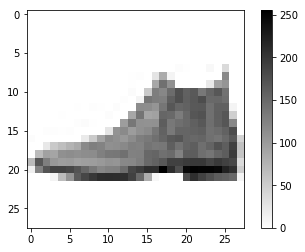

In [8]:
%matplotlib inline

plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)#imshow is used to display pixel images
plt.colorbar()
plt.show()

In [9]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


We need to normalize the images so that they range from 0 to 1

In [10]:
test_images = test_images/255.0
train_images = train_images/255.0

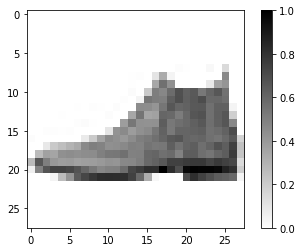

In [11]:
%matplotlib inline

plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

As the color bar shows, our images are now normalized to the range 0-1

Let's take a look at our first 25 images just to get an idea of the bigger picture of our dataset. We'll work with the test set since it is smaller.

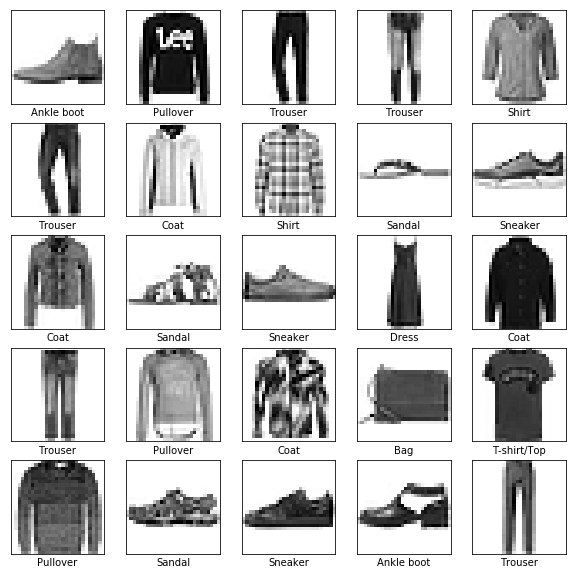

In [12]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[test_labels[i]])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()
    

### Building the model

We're going to use a bit of an arbitrary model for this.  
Flatten -> Hidden(128) -> Output(10 softmax)  
In real world applicatinos, it makes more sense to build research-backed models.

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [14]:
#compile model
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",# We typically use categorical_entropy for one-hot and the sparse for softmax
             metrics=["accuracy"])

In [15]:
#train the model on 10 epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.4987 - acc: 0.8228
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.3749 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3365 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.3111 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.2935 - acc: 0.8930
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2783 - acc: 0.8982
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2660 - acc: 0.9008
Epoch 8/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2560 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2467 - acc: 0.9080
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2371 - acc: 0.9111

We end up with a >90% accuracy after training. Let's evaluate this against our test set

In [16]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


[0.3260565698623657, 0.8867]

On testing, we have an accuracy of >88%. We have overfit a little. But let's try a prediction anyway. We know that the first item should be an ankle boot

In [17]:
prediction = model.predict(np.array([test_images[0]]))

In [18]:
print("Prediction = {}, Actual Label = {}".format(class_names[np.argmax(prediction[0])],class_names[test_labels[0]]))

Prediction = Ankle boot, Actual Label = Ankle boot


It works! 88% accuracy is not so bad after all
We'll now test with a CNN model

### CNN
Convolutional Neural Nets are more complex than simple Artificial Neural Nets. But they tend to do better on pictures.

In [19]:
# The only difference is in the model.
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding="same",
                           activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64,(3,3), padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [20]:
cnn_model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",# We typically use categorical_entropy for one-hot and the sparse for softmax
             metrics=["accuracy"])

In [21]:
# A very necessary step for our CNN input layer
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [22]:
#train the model on 10 epochs
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64)
print("Training complete")

Epoch 1/10
60000/60000 [==============================] - 39s 644us/step - loss: 0.4440 - acc: 0.8397
Epoch 2/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.2903 - acc: 0.8962
Epoch 3/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.2432 - acc: 0.9115
Epoch 4/10
60000/60000 [==============================] - 38s 641us/step - loss: 0.2109 - acc: 0.9230
Epoch 5/10
60000/60000 [==============================] - 37s 622us/step - loss: 0.1853 - acc: 0.9315
Epoch 6/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.1654 - acc: 0.9394
Epoch 7/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.1440 - acc: 0.9464
Epoch 8/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.1248 - acc: 0.9531
Epoch 9/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.1076 - acc: 0.9609
Epoch 10/10
60000/60000 [==============================] - 37s 624us/step - loss: 

93% accuracy! On just 5 epochs!
98% accuracy in 10 epochs, but that is just clearly an overfitting.

Evaluating against test data

In [23]:
cnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 175us/step


[0.2772657942906022, 0.9129]

We still get an accuracy above 91%!!